# Tutorial 10 - Tensorflow Datasets

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_9-PyTorch/Tutorial_9-PyTorch.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_3-Model_Engineering/Tutorial_9-PyTorch/Tutorial_9-PyTorch.ipynb)

<a id='top'></a>

Public datasets are an important resource for accelerating machine learning research. However, writing custom scripts to fetch and prepare each dataset individually can be tedious. 

**TensorFlow DataSets (TFDS)** handles the tasks of sourcing the data and standardizing it into a consistent format. Furthermore, TFDS utilizes the `tensorflow.data API` to construct high-performance input pipelines that are seamlessly usable with tensorflow.keras models.

## Overview

TFDS is a set of ready-to-use datasets for various machine learning tasks, including Computer Vision datasets, Natural Language Processing datasets, and miscellaneous other datasets for performing Unsupervised Learning, Reinforcement learning, and more.

The entire list of available datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview). 

All of these datasets are contained under the `tensorflow.data.Datasets` module.

To install TFDS:

    pip install tfds-nightly

TFDS is pre-installed in Google Colab, and it can be directly imported as in the next cell.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

The following line also displays the list all the available datasets in TFDS.

In [ ]:
tfds.list_builders()

## Load Dataset with TFDS 

The easiest way of loading a dataset with TFDS is with `tfds.load`. 

It will:

1. Download the data and save it as `tfrecord` files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.

In [3]:
(training_data, test_data), info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])

Arguments in `tfds.load` include:

- First argument is the name of dataset.
- param `'split'` controls which split we wish to load (e.g., train, test, or validation).
- param `'shuffle_files'` controls whether or not data is shuffled between each epoch.
- param `'data_dir'` controls where the dataset is saved (defaults to `~/tensorflow_datasets/`).
- param `'with_info'` controls whether or not the metadata for the dataset is included.
- param `'as_supervised'` controls whether or not a tuple `(features, label)` is returned (as opposed to just features).
- param `'download'` controls whether or not the library will attempt to download the dataset.

We can access the dataset metadata with `info` as in the next cell.

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\vakanski\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

Features metadata can inlcude features shape, label shape, etc.

In [5]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

We can also inspect the number of classes and label names.

In [6]:
print(info.features["label"].num_classes)
print(info.features["label"].names)

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


The following code prints shapes and dtypes of the data.

In [7]:
print(info.features.shape)
print(info.features.np_dtype)
print(info.features['image'].shape)
print(info.features['image'].np_dtype)


{'image': (28, 28, 1), 'label': ()}
{'image': <class 'numpy.uint8'>, 'label': <class 'numpy.int64'>}
(28, 28, 1)
<class 'numpy.uint8'>


### Slicing API for Customized Dataset Split

In [8]:
# Fashion MNIST dataset, get 25% to 75% of train dataset 
ds = tfds.load('mnist', split='train[25%:75%]')

In [9]:
# Get first 4,000 of the data for training
ds = tfds.load('fashion_mnist', split='train[:4000]')

In [10]:
# Get 25% of training and all of the test data
ds = tfds.load('fashion_mnist', split='train[:25%]+test')

### Cross-Validation

In [11]:
vals_ds = tfds.load('fashion_mnist', split=[
    f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)])

trains_ds = tfds.load('fashion_mnist', split=[
    f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)])

In [12]:
# First fold of validation DS
vals_ds_fold1 =vals_ds[0]

### Iterate over the Dataset in Batches

In [13]:
batch_size = 32

for epoch in range(1):
    print(f'epoch {epoch}')   
    n = 0
    for img, label in training_data.batch(batch_size):
        # print the first 10 batches
        while n < 10:
            # notice that img.shape = [batch size, pixels width, pixels heights, channels number)
            # notice that label.shape = 32, therefore 32 labels are shown
            print(f'img: {img.shape}, labels: {label}') 
            # we can train a model here
            n = n+1            

epoch 0
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]
img: (32, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


### Visualization

Method1: features and label samples from TFDS objects can be visualized in a Jupyter Notebook by using `tfds.as_dataframe` to convert into pandas DataFrame.

In [14]:
# list 5 images and labels from mnist dataset
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(5), info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


In [15]:
# list 5 images and labels from mnist dataset
tfds.as_dataframe(ds.take(5), info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


Method 2: `tfds.show_examples` returns a matplotlib figure with data samples and labels (only image datasets are supported with this method).

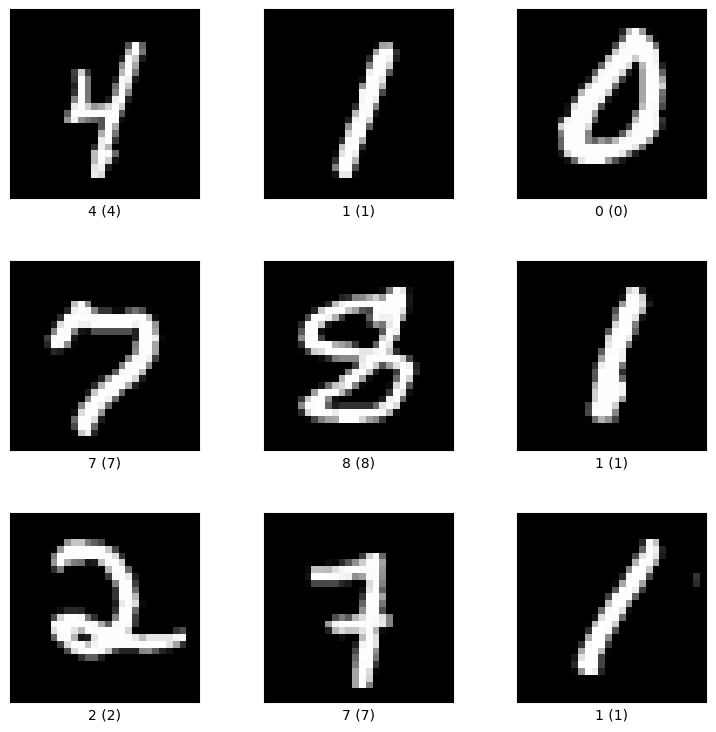

In [16]:
import matplotlib.pyplot as plt

fig = tfds.show_examples(ds, info)

### Create Your Own TFDS with `tf.data.Dataset.from_tensor_slices`

In [17]:
np.random.seed(1)

features = np.random.uniform(0,1, size=(32, 100, 100))
labels = np.random.randint(0, 2, size=(32, 1))

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(5)  

for epoch in range(2):
    for step, (x_batch, y_batch) in enumerate(dataset):
        print(f'step: {step}, x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')
    print()        

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)



### Simple Example of a Pipeline with TFDS in a CNN Model

In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds

# MODEL DEFINITION 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# EXTRACT PHASE 
data = tfds.load('horses_or_humans', split='train', as_supervised=True)
val_data = tfds.load('horses_or_humans', split='test', as_supervised=True)

# TRANSFORM PHASE 
def augmentimages(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.random_flip_left_right(image)
  return image, label

train = data.map(augmentimages)
train_batches = train.shuffle(100).batch(32)
validation_batches = val_data.batch(32)

# MODEL TRAINING PHASE
history = model.fit(train_batches, epochs=3, 
                    validation_data=validation_batches, validation_steps=1)

Epoch 1/3
33/33 [==============================] - 18s 509ms/step - loss: 3.5113 - accuracy: 0.5083 - val_loss: 0.6937 - val_accuracy: 0.4375
Epoch 2/3
33/33 [==============================] - 15s 435ms/step - loss: 0.6930 - accuracy: 0.5131 - val_loss: 0.6940 - val_accuracy: 0.4375
Epoch 3/3
33/33 [==============================] - 13s 401ms/step - loss: 0.6930 - accuracy: 0.5131 - val_loss: 0.6940 - val_accuracy: 0.4375


### References:

1. Moroney, L. (n.d.). AI and Machine Learning for Coders. O’Reilly Online Learning. https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html 
2. Tensorflow datasets. TensorFlow. (n.d.). https://www.tensorflow.org/datasets/overview#iterate_over_a_dataset 

[BACK TO TOP](#top)